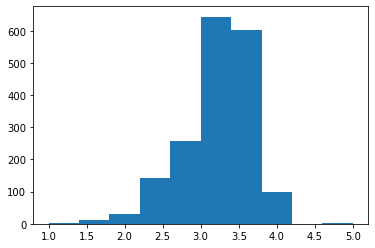

       Company  Rating  CocoaPercentage
0     A. Morin    3.75             63.0
1     A. Morin    2.75             70.0
2     A. Morin    3.00             70.0
3     A. Morin    3.50             70.0
4     A. Morin    3.50             70.0
...        ...     ...              ...
1790    Zotter    3.75             70.0
1791    Zotter    3.00             65.0
1792    Zotter    3.50             65.0
1793    Zotter    3.25             62.0
1794    Zotter    3.00             65.0

[1795 rows x 3 columns]
                                        Rating  CocoaPercentage
Company                                                        
Tobago Estate (Pralus)                4.000000        70.000000
Heirloom Cacao Preservation (Zokoko)  3.875000        70.000000
Ocelot                                3.875000        72.500000
Amedei                                3.846154        69.538462
Matale                                3.812500        71.000000
Patric                                3.791667 

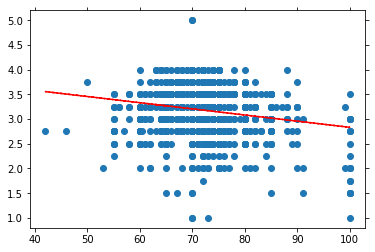

In [2]:
#import codecademylib3_seaborn
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

webpage = requests.get("https://s3.amazonaws.com/codecademy-content/courses/beautifulsoup/cacao/index.html")

soup = BeautifulSoup(webpage.content, "html.parser")

ratings = []

chocolate_ratings = soup.find_all("td", {"class":"Rating"})
for rating in chocolate_ratings[1:]:
    ratings.append(float(rating.get_text()))

plt.hist(ratings)
plt.show()

company_tags = soup.select(".Company")
companies_names = []
for company in company_tags[1:]:
    companies_names.append(company.get_text())

cocoa_percents = []
cocoa_percent_tags = soup.select(".CocoaPercent")
for td in cocoa_percent_tags[1:]:
    percent = float(td.get_text().strip('%'))
    cocoa_percents.append(percent)

d = {"Company": companies_names, "Rating": ratings, "CocoaPercentage": cocoa_percents}
dataframe = pd.DataFrame.from_dict(d)

print(dataframe)

mean_vals = dataframe.groupby("Company").mean()

ten_best = mean_vals.nlargest(10, "Rating")
print(ten_best)

plt.cla()
plt.scatter(dataframe.CocoaPercentage, dataframe.Rating)
z = np.polyfit(dataframe.CocoaPercentage, dataframe.Rating, 1)
line_function = np.poly1d(z)
plt.plot(dataframe.CocoaPercentage, line_function(dataframe.CocoaPercentage), "r--")
plt.show()
